In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from keras.utils import to_categorical

/Users/chakryaros/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import Mnist Dataset

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

In [2]:
train_images_filepath = 'dataset/mnist_dataset/train-images.idx3-ubyte'
train_labels_filepath = 'dataset/mnist_dataset/train-labels.idx1-ubyte'
test_images_filepath = 'dataset/mnist_dataset/t10k-images.idx3-ubyte'
test_labels_filepath = 'dataset/mnist_dataset/t10k-labels.idx1-ubyte'

In [3]:
X_train, y_train = loadlocal_mnist( train_images_filepath, train_labels_filepath)
X_test, y_test = loadlocal_mnist(test_images_filepath, test_labels_filepath)

In [4]:
print("The shape of of X_train: ", X_train.shape)
print("The shape of of y_train: ", y_train.shape)

The shape of of X_train:  (60000, 784)
The shape of of y_train:  (60000,)


In [5]:
print("The shape of of X_test: ", X_test.shape)
print("The shape of of y_test: ", y_test.shape)

The shape of of X_test:  (10000, 784)
The shape of of y_test:  (10000,)


## Data visualization on Minist Dataset

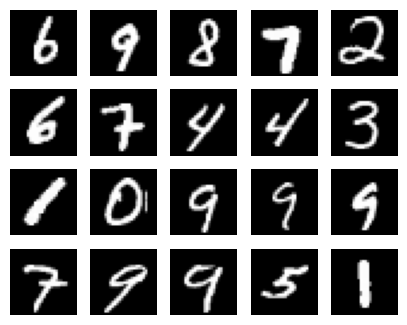

In [6]:
# sample 20 mnist digits from train dataset
x = X_train.reshape(60000, 28, 28)
indexes = np.random.randint(0, x.shape[0], size=20)
images = x[indexes]
labels = y_train[indexes]


# plot the 20 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

In [7]:
# compute the number of labels
num_labels = len(np.unique(y_train))
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 15

# Scale images to the [0, 1] range
X_train = X_train.reshape(60000, 28, 28)
X_test = X_test.reshape(10000, 28, 28)
print("The shape of of X_test after reshape: ", X_train.shape)
print("The shape of of y_test after reshape: ", X_test.shape)

# convert to one-hot vector
y_train_vector = to_categorical(y_train, num_labels)
y_test_vector = to_categorical(y_test, num_labels)
print("The shape of of X_test after convert to one-hot vector: ", y_train_vector.shape)
print("The shape of of y_test after convert to one-hot vector: ", y_test_vector.shape)

The shape of of X_test after reshape:  (60000, 28, 28)
The shape of of y_test after reshape:  (10000, 28, 28)
The shape of of X_test after convert to one-hot vector:  (60000, 10)
The shape of of y_test after convert to one-hot vector:  (10000, 10)


## Building and Training the Classification ANN

### Importing the Keras libraries and packages

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad

### Initialising the ANN

In [9]:
ann_model = Sequential()

### Add layers

In [14]:
ann_model.add(Flatten(input_shape=(28,28)))
ann_model.add(Dense(512, activation="relu"))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(256, activation="relu"))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(10, activation='sigmoid'))

### Model summary

In [15]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,878 (2.63 MB)

 Trainable params: 689,876 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Build and Compare Adam optimizer with other optimizers

In [16]:
def build_model(x_train, y_train, optimizer, model):
    print("Opimizer: ", optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=20)
    return model, history

In [17]:
adam_ann_model, adam_ann_history = build_model(X_train, y_train_vector, Adam(), ann_model)
rmsprop_ann_model, rmsprop_ann_history = build_model(X_train, y_train_vector, RMSprop(), ann_model)
adagrad_ann_model, adagrad_ann_history = build_model(X_train, y_train_vector, Adagrad(), ann_model)
sgd_ann_model, sgd_ann_history = build_model(X_train, y_train_vector, SGD(), ann_model)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x313994a90>
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9009 - loss: 0.6158
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9318 - loss: 0.3389
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9311 - loss: 0.3398
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9253 - loss: 0.3618
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9291 - loss: 0.3445
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9288 - loss: 0.3486
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9340 - loss: 0.3310
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9286 - loss: 0.3557
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9318 - loss: 0.3448
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9250 - loss: 0.3786
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9196 -

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9036 - loss: 0.5018
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8971 - loss: 0.5210
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8815 - loss: 0.5891
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8689 - loss: 0.6392
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7801 - loss: 0.8081
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8584 - loss: 0.6526
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8444 - loss: 0.6911
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8022 - loss: 0.7658
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7996 - loss: 0.7859
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8467 - loss: 0.7096
Epoch 16/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8024 - loss: 0.8464
Epoch 17/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc

### Evaluate the model on the test set

In [18]:
loss, acc = adam_ann_model.evaluate(X_test, y_test_vector, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5295 - loss: 1.3250

Test accuracy: 54.3%


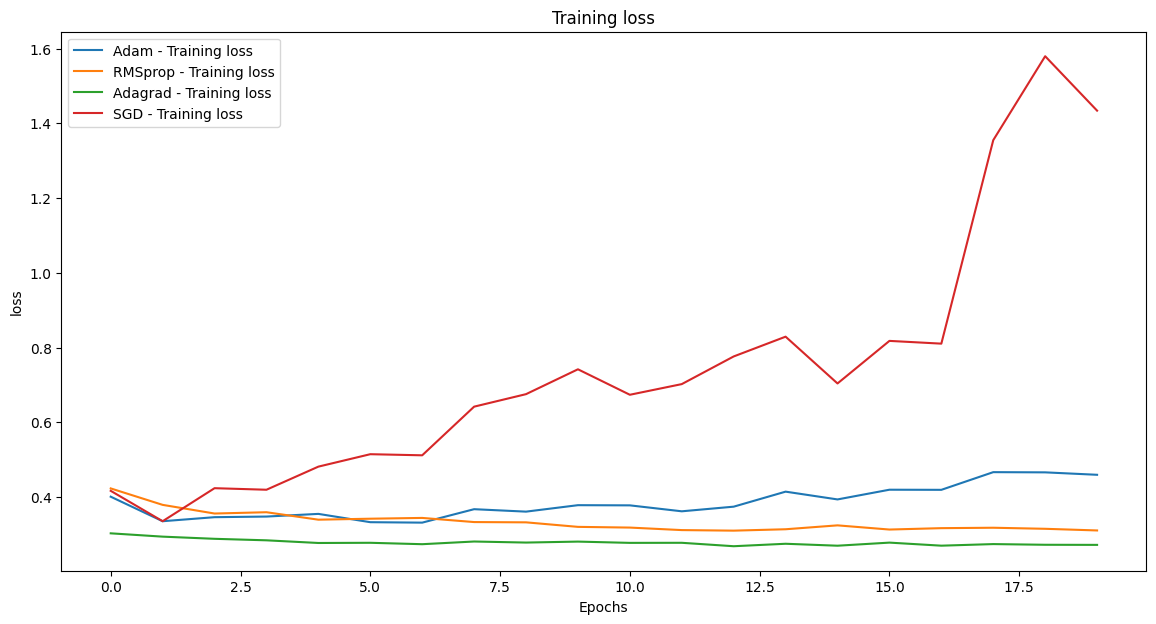

In [19]:
# Function to plot training loss
def plot_loss(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['loss'], label=f'{name} - Training loss')
    
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

# Plot the results
histories = [adam_ann_history, rmsprop_ann_history, adagrad_ann_history, sgd_ann_history]
plot_loss(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])


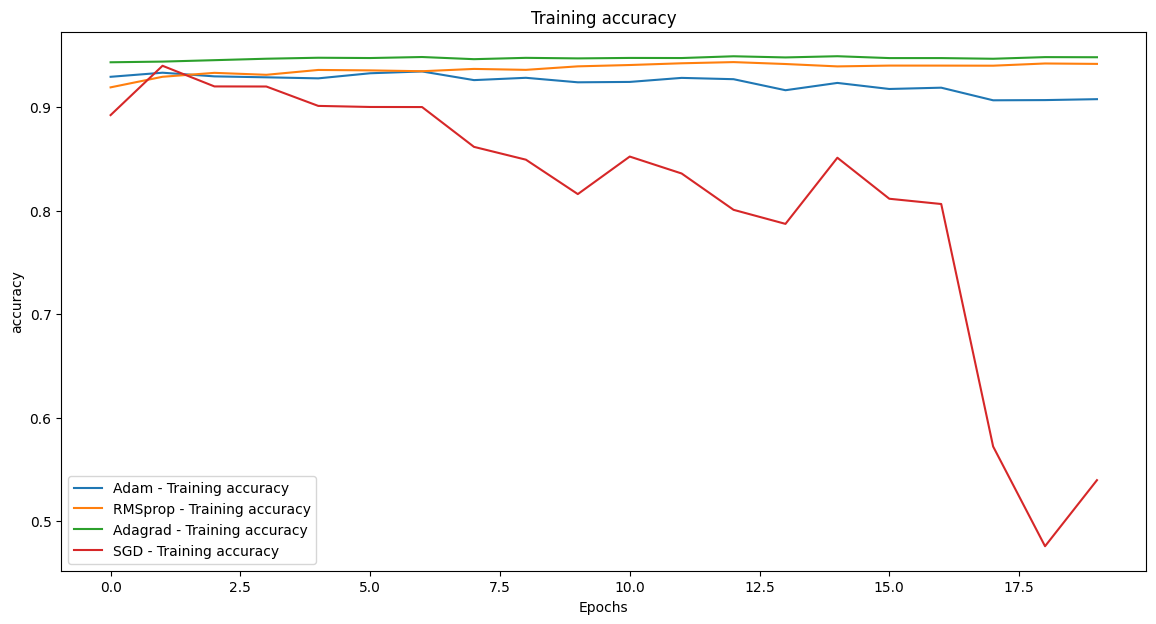

In [20]:
# Function to plot training accuracy
def plot_accuracy(histories, optimizer_names):
    plt.figure(figsize=(14, 7))
    
    for history, name in zip(histories, optimizer_names):
        plt.plot(history.history['accuracy'], label=f'{name} - Training accuracy')
    
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

plot_accuracy(histories, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])

## Import IMDB Dataset of 50K Movie Reviews

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam

In [22]:
df = pd.read_csv("dataset/IMDB_50k_movie_reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
df.shape

(50000, 2)

In [24]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [25]:
df["review"].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

### Encode the labels

In [26]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

### Splitting the dataset into training and testing

In [29]:
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train_imdb)
X_train_seq = tokenizer.texts_to_sequences(X_train_imdb)
X_test_seq = tokenizer.texts_to_sequences(X_test_imdb)

X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Verify the shape of data
print(X_train_pad.shape, X_test_pad.shape)

(40000, 200) (10000, 200)


### Build the ANN model

In [50]:
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train_pad.shape[1],)))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

### Model summary

In [51]:
ann_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,897 (691.00 KB)

 Trainable params: 176,897 (691.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
def build_model_IMDB(x_train, y_train, optimizer, model):
    print("Opimizer: ", optimizer)
    model.compile(loss="mse", optimizer=optimizer, metrics = ['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=15)
    return model, history

## Build and Compare Adam optimizer with other optimizers

In [53]:
adam_ann_model_IMDB, adam_ann_history_IMDB = build_model_IMDB(X_train_pad, y_train_imdb, Adam(), ann_model)
rmsprop_ann_model_IMDB, rmsprop_ann_history_IMDB = build_model_IMDB(X_train_pad, y_train_imdb, RMSprop(), ann_model)
adagrad_ann_model_IMDB, adagrad_ann_history_IMDB = build_model_IMDB(X_train_pad, y_train_imdb, Adagrad(), ann_model)
sgd_ann_model_IMDB, sgd_ann_history_IMDB = build_model_IMDB(X_train_pad, y_train_imdb, SGD(), ann_model)

Opimizer:  <keras.src.optimizers.adam.Adam object at 0x30908d0d0>
Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4976 - loss: 0.5024
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4969 - loss: 0.5031
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4997 - loss: 0.5003
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4976 - loss: 0.5024
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4999 - loss: 0.5001
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4999 - loss: 0.5001
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4983 - loss: 0.5017
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5016 - loss: 0.4984
Epoch 9/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 0.5000
Epoch 10/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5029 - loss: 0.4971
Epoch 11/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5023 -

### Evaluate the model on the test set

In [54]:
loss, acc = adam_ann_model_IMDB.evaluate(X_test_pad, y_test_imdb, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.4978 - loss: 0.5022

Test accuracy: 49.6%


In [55]:
print(adam_ann_history_IMDB)

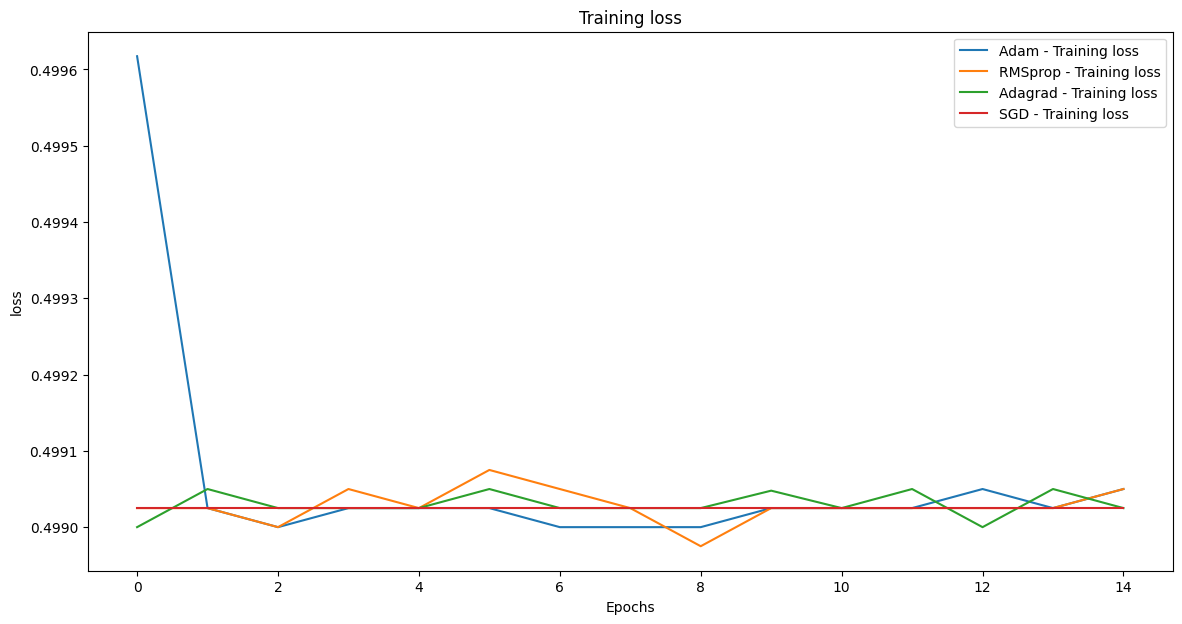

In [56]:
histories_IMDB = [adam_ann_history_IMDB, rmsprop_ann_history_IMDB, adagrad_ann_history_IMDB, sgd_ann_history_IMDB]
plot_loss(histories_IMDB, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])

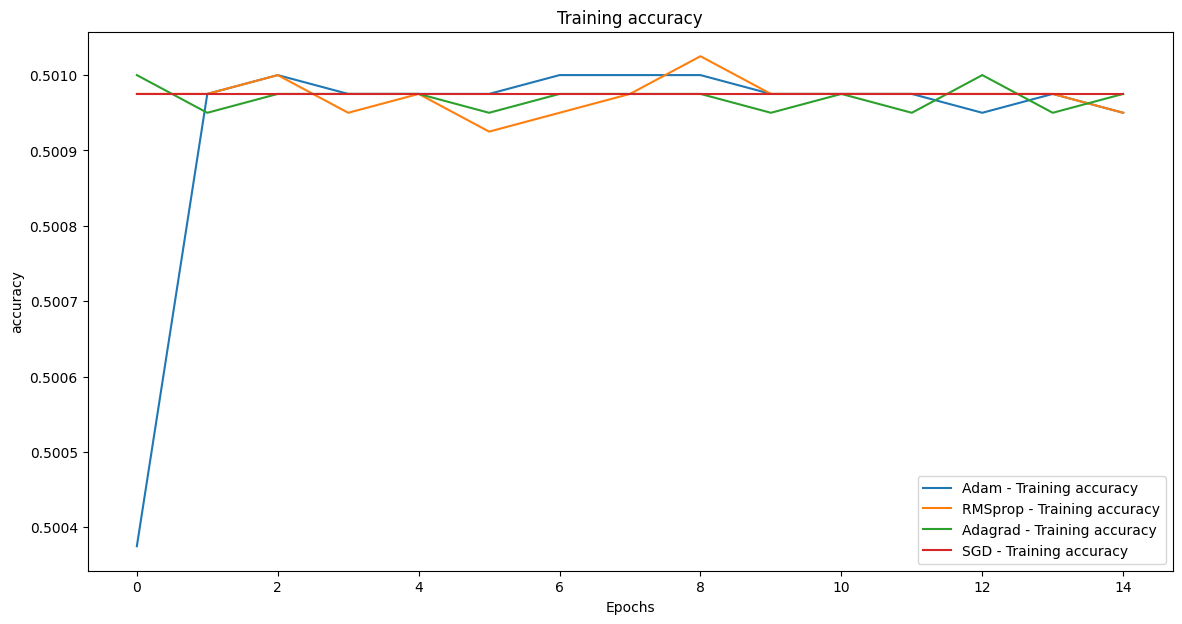

In [57]:
plot_accuracy(histories_IMDB, ['Adam', 'RMSprop', 'Adagrad', 'SGD'])